Data Exploration - Instacart Dataset - Ilya Korzhenevich

In [310]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

Importing datasets and looking at some basics

In [311]:
df_orders = pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\orders.csv\orders.csv")

In [312]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [313]:
df_orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [314]:
# Number of rows in df_orders
df_orders.shape[0]

3421083

In [315]:
df_departments = pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\departments.csv\departments.csv")

In [316]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [317]:
# Number of rows in df_departments
df_departments.shape[0]

21

In [318]:
df_products=pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\products.csv\products.csv")

In [319]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [320]:
# Number of rows in df_products
df_products.shape[0]

49688

In [321]:
df_aisles = pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\aisles.csv\aisles.csv")

In [322]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [323]:
# Number of rows in df_aisles
df_aisles.shape[0]

134

In [324]:
df_order_products_prior=pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\order_products__prior.csv\order_products__prior.csv")

In [325]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [326]:
df_order_products_prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [327]:
# Number of rows in df_order_products_prior
df_order_products_prior.shape[0]

32434489

In [328]:
df_order_products_train = pd.read_csv(r"C:\Users\akorz\Box Sync\4-PERSONAL\UC\2-Data Mining Spring 2020\instacart-market-basket-analysis\order_products__train.csv\order_products__train.csv")

In [329]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [330]:
df_order_products_train.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [331]:
# Number of rows in df_order_products_train
df_order_products_train.shape[0]

1384617

In [332]:
# merging datasets for easier operations
prior_orders_merge = pd.merge(df_order_products_prior, df_products, on="product_id")

In [333]:
prior_orders_merge.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [334]:
print ("Length of merged dataframe:", prior_orders_merge.shape[0])

Length of merged dataframe: 32434489


In [335]:
# The Prior/Train Size Split
df_order_products_prior.shape[0]/(df_order_products_prior.shape[0]+df_order_products_train.shape[0])

0.9590581430508541

In [336]:
# number of orders in the prior set
df_order_products_prior.order_id.nunique()

3214874

In [337]:
# number of orders in the train set
df_order_products_train.order_id.nunique()

131209

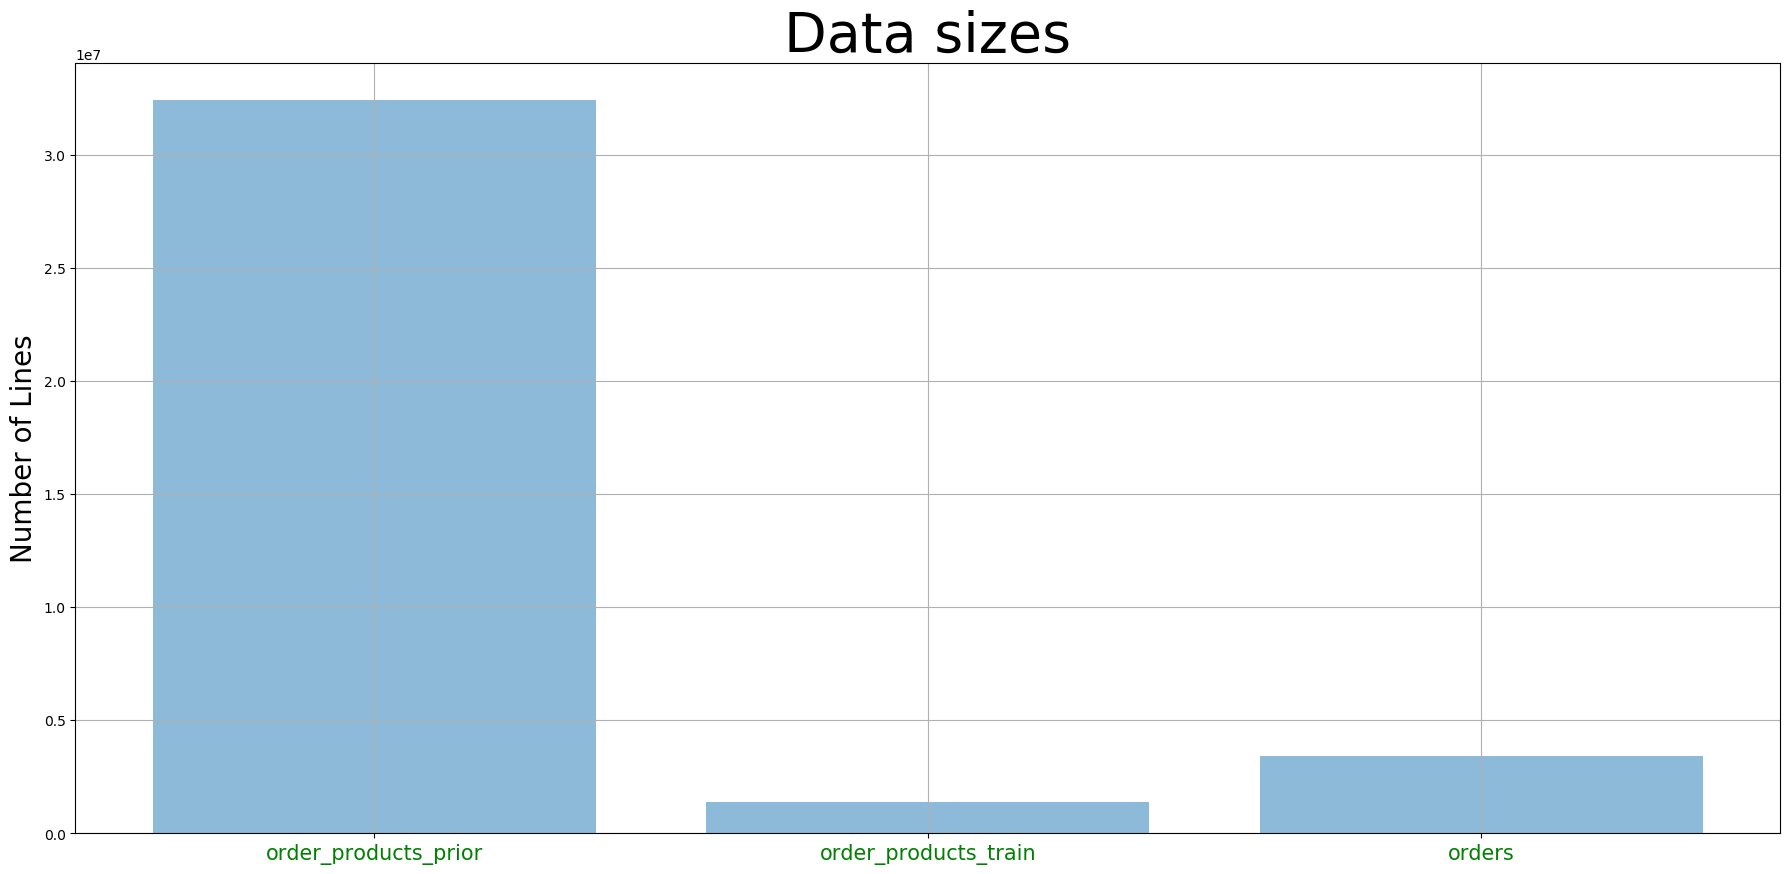

In [338]:
# Charting data sizes (number of rows) for the three large files
data_sources = ["order_products_prior", "order_products_train", "orders"]
y_pos = np.arange(3)
number_of_lines = [df_order_products_prior.shape[0],df_order_products_train.shape[0], df_orders.shape[0]]

plt.figure(figsize=(22,10))
plt.bar(y_pos, number_of_lines, align='center', alpha=.5, width =0.8)
plt.xticks(y_pos, data_sources, fontsize=15, color = "g")
plt.ylabel('Number of Lines', fontsize=20)
plt.title('Data sizes', fontsize=40)
plt.grid(True)
plt.show()

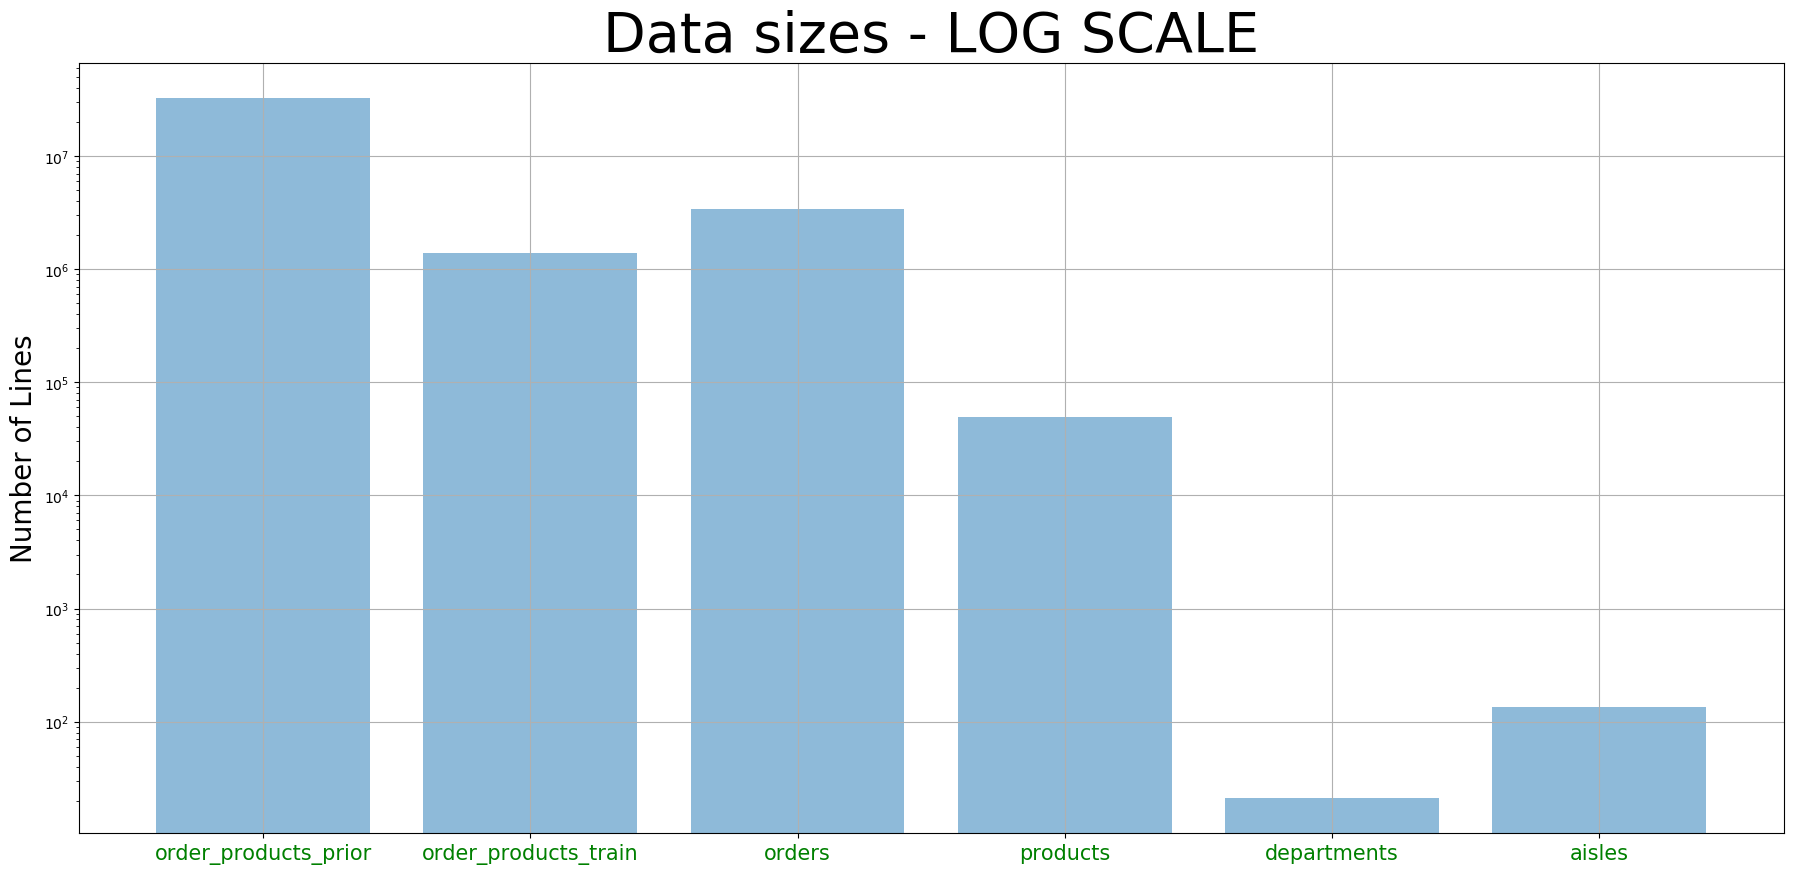

In [339]:
# Charting data sizes (number of rows) for all 6 files - 
# need to use log scale due to vastly different scale

data_sources = ["order_products_prior", "order_products_train", "orders", "products", "departments", "aisles"]
y_pos = np.arange(6)
number_of_lines = [df_order_products_prior.shape[0],df_order_products_train.shape[0], 
                   df_orders.shape[0],df_products.shape[0], df_departments.shape[0], df_aisles.shape[0] ]

plt.figure(figsize=(22,10))
plt.bar(y_pos, number_of_lines, align='center', alpha=.5, width =0.8, log=True)
plt.xticks(y_pos, data_sources, fontsize=15, color = "g")
plt.ylabel('Number of Lines', fontsize=20)
plt.title('Data sizes - LOG SCALE', fontsize=40)
plt.grid(True)
plt.show()

In [340]:
# some basics on the orders dataset
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [341]:
# some basic stats on the orders dataset
df_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


C:\Users\akorz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\akorz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


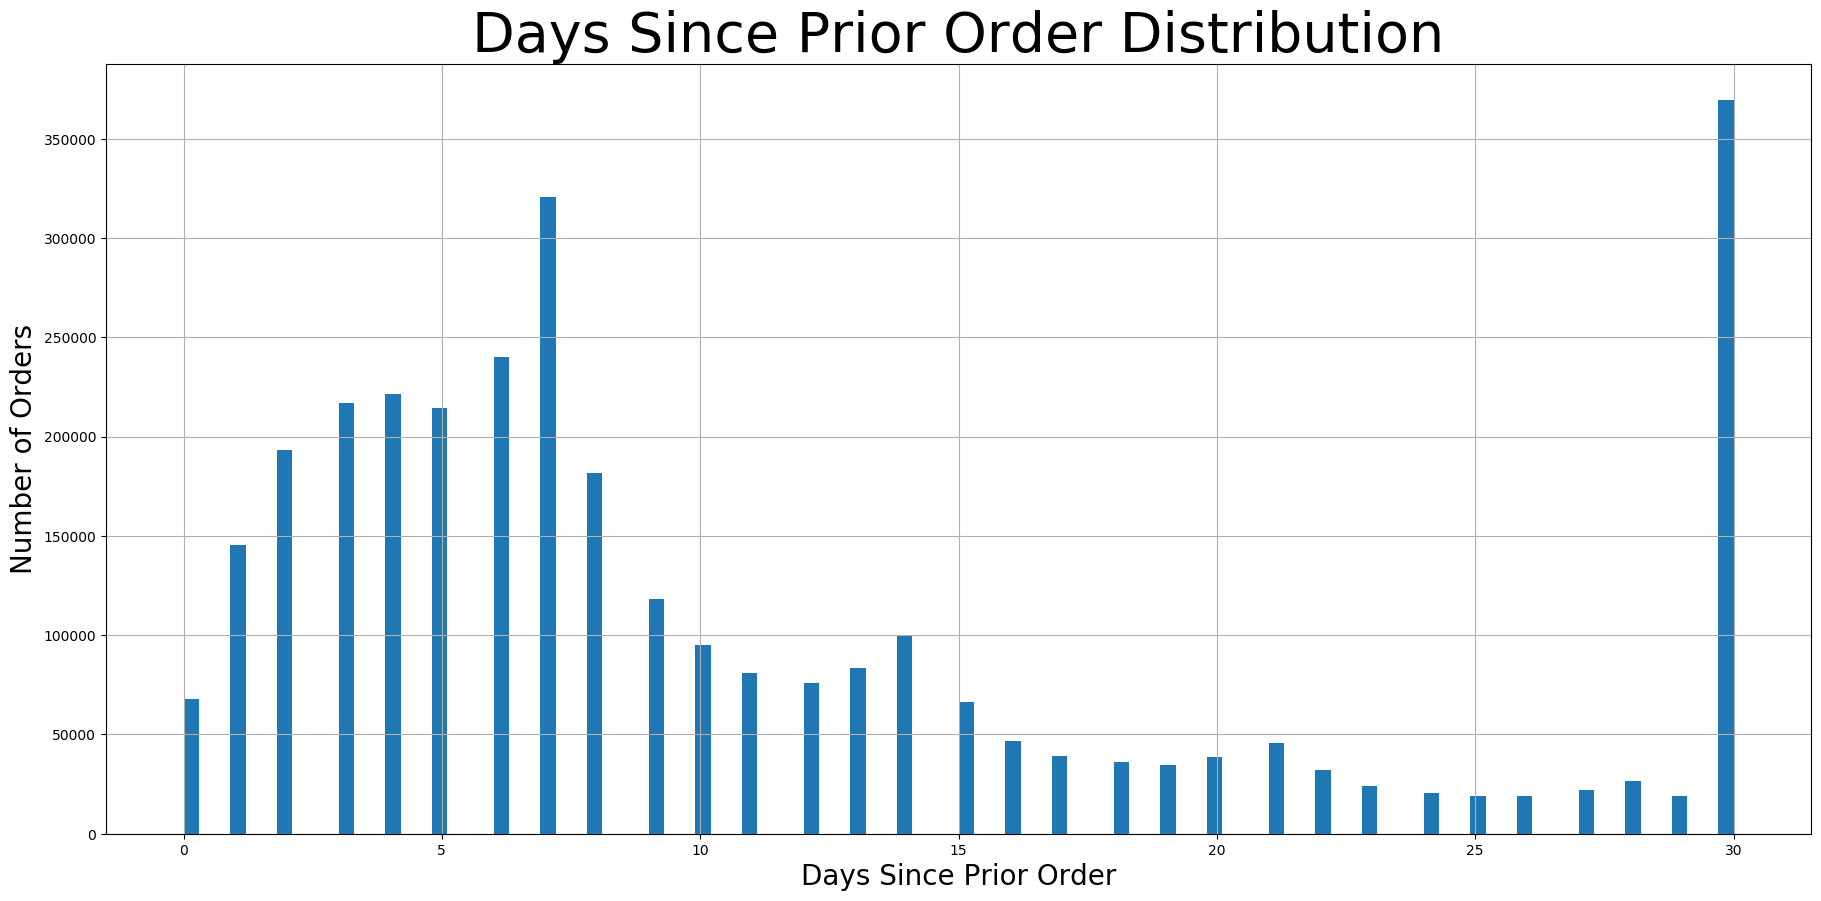

In [342]:
# Charting time between orders

plt.figure(figsize=(22,10))
plt.hist(df_orders["days_since_prior_order"], bins=100)
plt.title("Days Since Prior Order Distribution", fontsize=40)
plt.xlabel("Days Since Prior Order", fontsize=20)
plt.ylabel("Number of Orders", fontsize=20)
plt.grid(True)
plt.show()

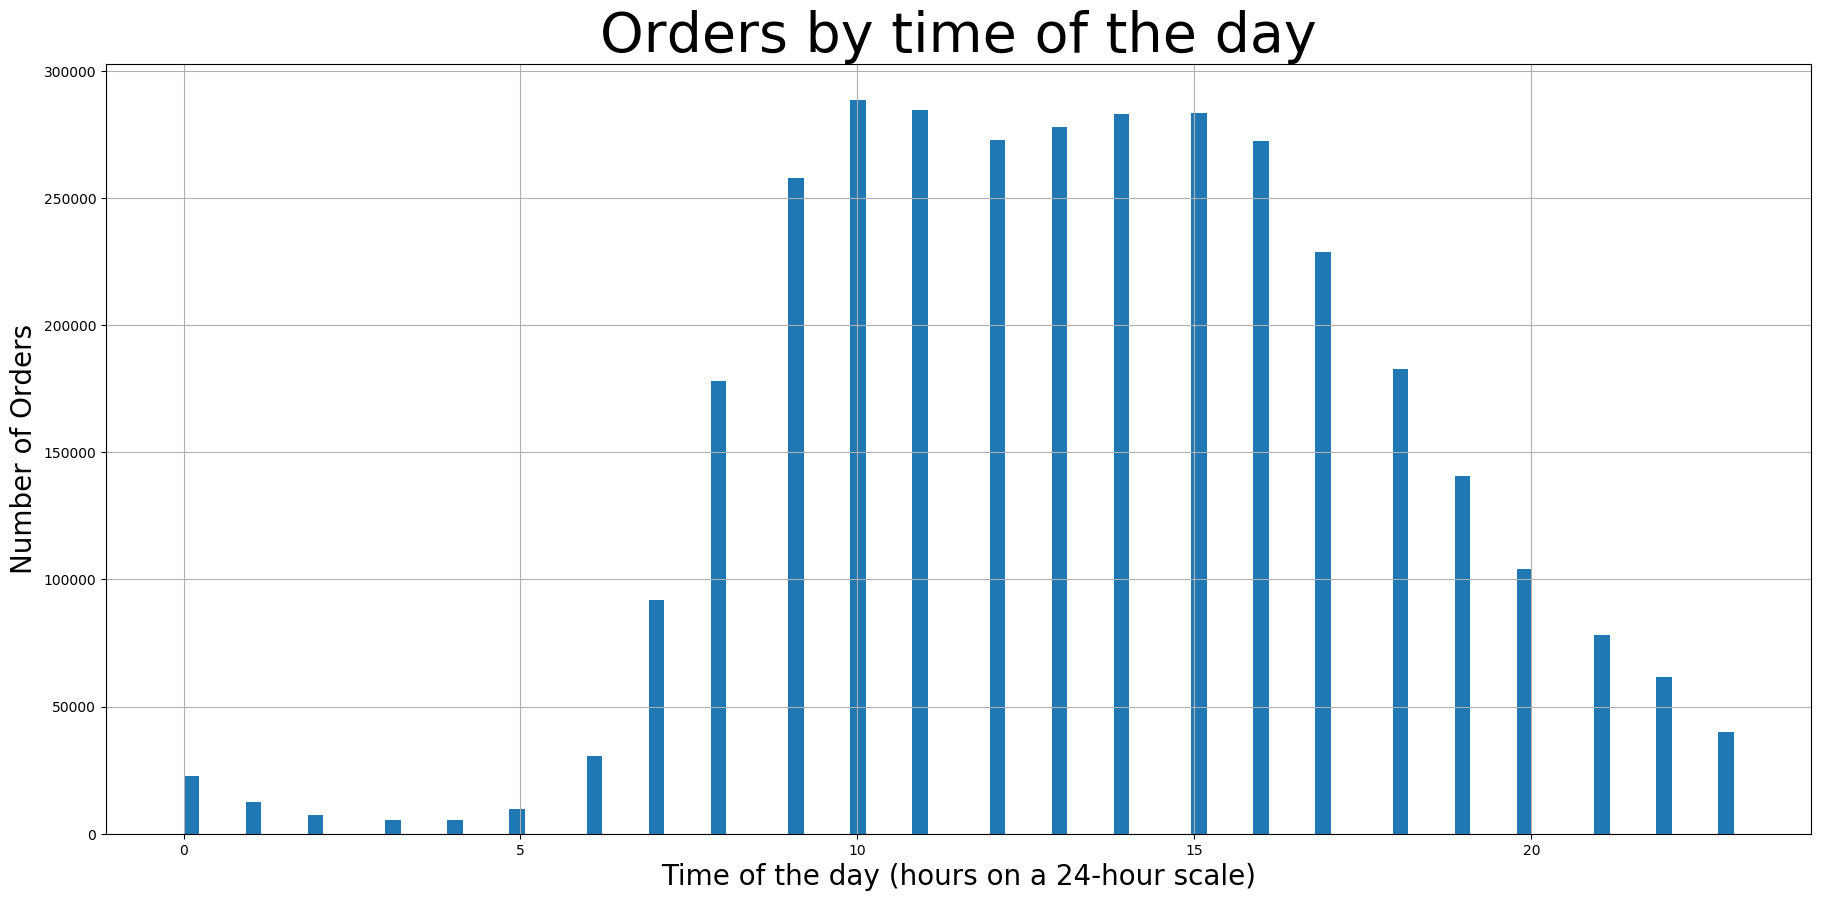

In [343]:
# Charting time of the day distribution for orders

plt.figure(figsize=(22,10))
plt.hist(df_orders["order_hour_of_day"], bins=100)
plt.title("Orders by time of the day", fontsize=40)
plt.xlabel("Time of the day (hours on a 24-hour scale)", fontsize=20)
plt.ylabel("Number of Orders", fontsize=20)
plt.grid(True)
plt.show()

As expected, orders peak during normal waking hours

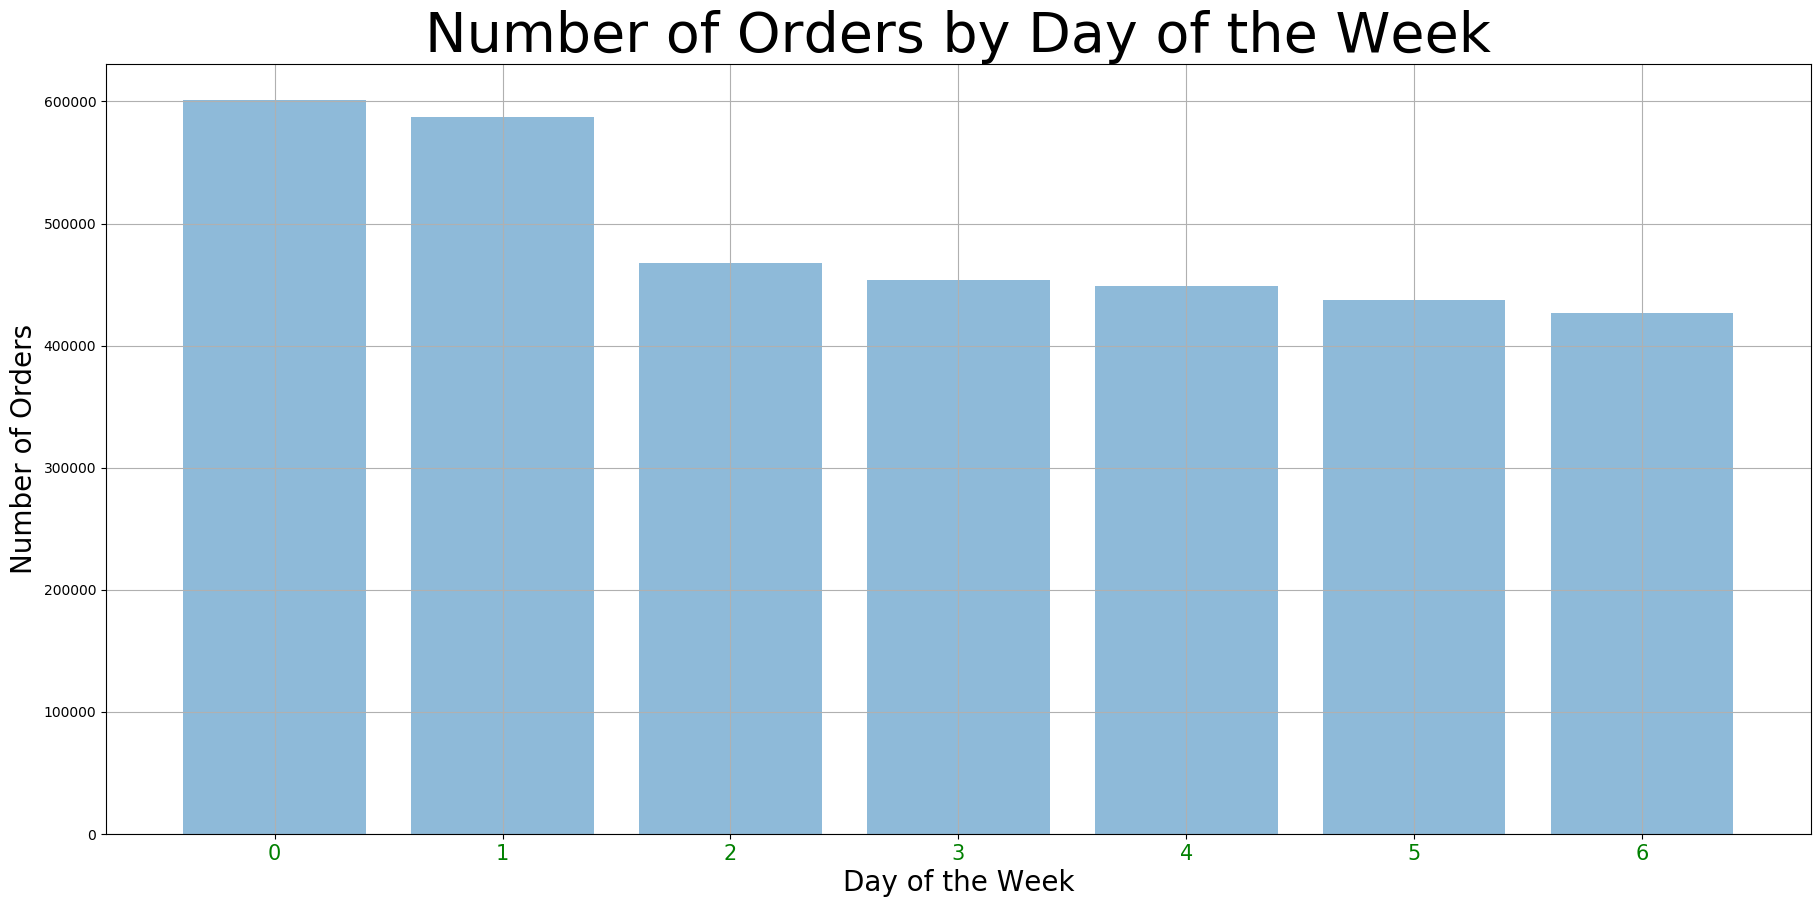

In [344]:
# Charting day of the week distribution for orders

orders_by_day_of_week=df_orders["order_dow"].value_counts()
data_sources = range(7)
y_pos = np.arange(7)

plt.figure(figsize=(22,10))
plt.bar(y_pos, orders_by_day_of_week, align='center', alpha=.5, width =0.8)
plt.xticks(y_pos, data_sources, fontsize=15, color = "g")
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.title('Number of Orders by Day of the Week', fontsize=40)
plt.grid(True)
plt.show()

Saturdays and Sundays (presumably those are days 0 and 1) have slightly higher volume

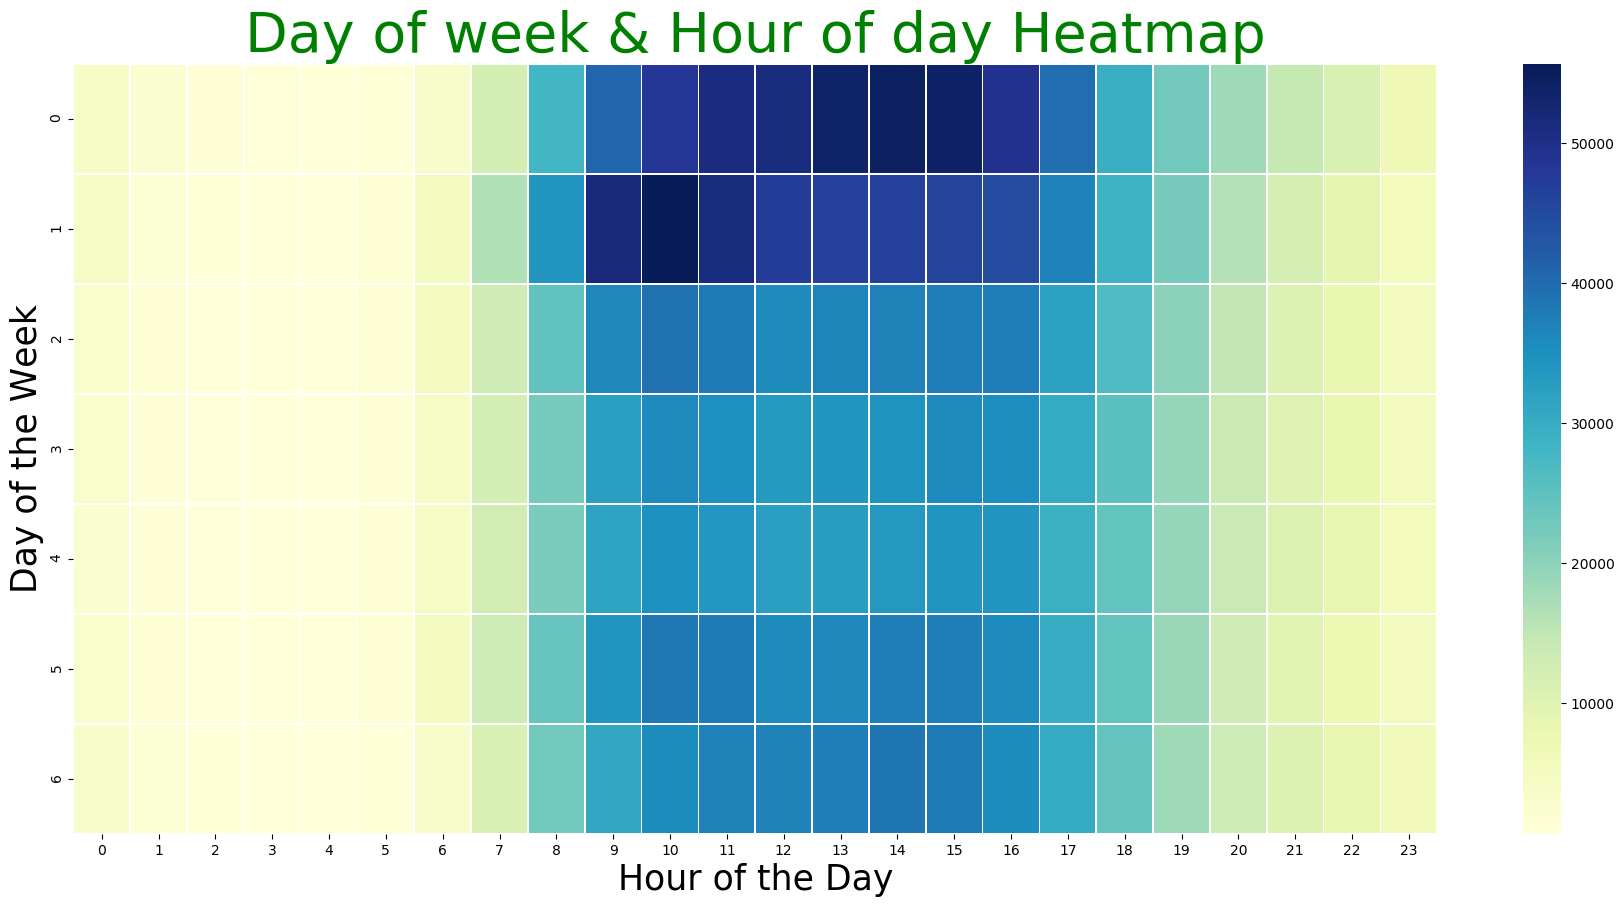

In [345]:
# Day of week & Hour of day Heatmap

heatmap_df = df_orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
heatmap_df = heatmap_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(22,10))
sns.heatmap(heatmap_df, linewidths=.5, cmap="YlGnBu")
plt.xlabel('Hour of the Day', fontsize=25)
plt.ylabel('Day of the Week', fontsize=25)
plt.title("Day of week & Hour of day Heatmap", fontsize=40, color="green")

plt.show()


As we see, the busiest times are Saturday afternoons and Sunday mornings

In [346]:
# Number of Users
print("The number of users is", df_orders["user_id"] .max())

The number of users is 206209


In [347]:
# Creating a list with a number of orders for each user

total_orders=df_orders.shape[0]
orders_per_user_list=[]
counter=1
for i in range(total_orders-1):
    if (df_orders["user_id"][i]==df_orders["user_id"][i+1]):
        counter=counter+1
    else:
        orders_per_user_list.append(counter)
        counter=1
orders_per_user_list[:10]

[11, 15, 13, 6, 5, 4, 21, 4, 4, 6]

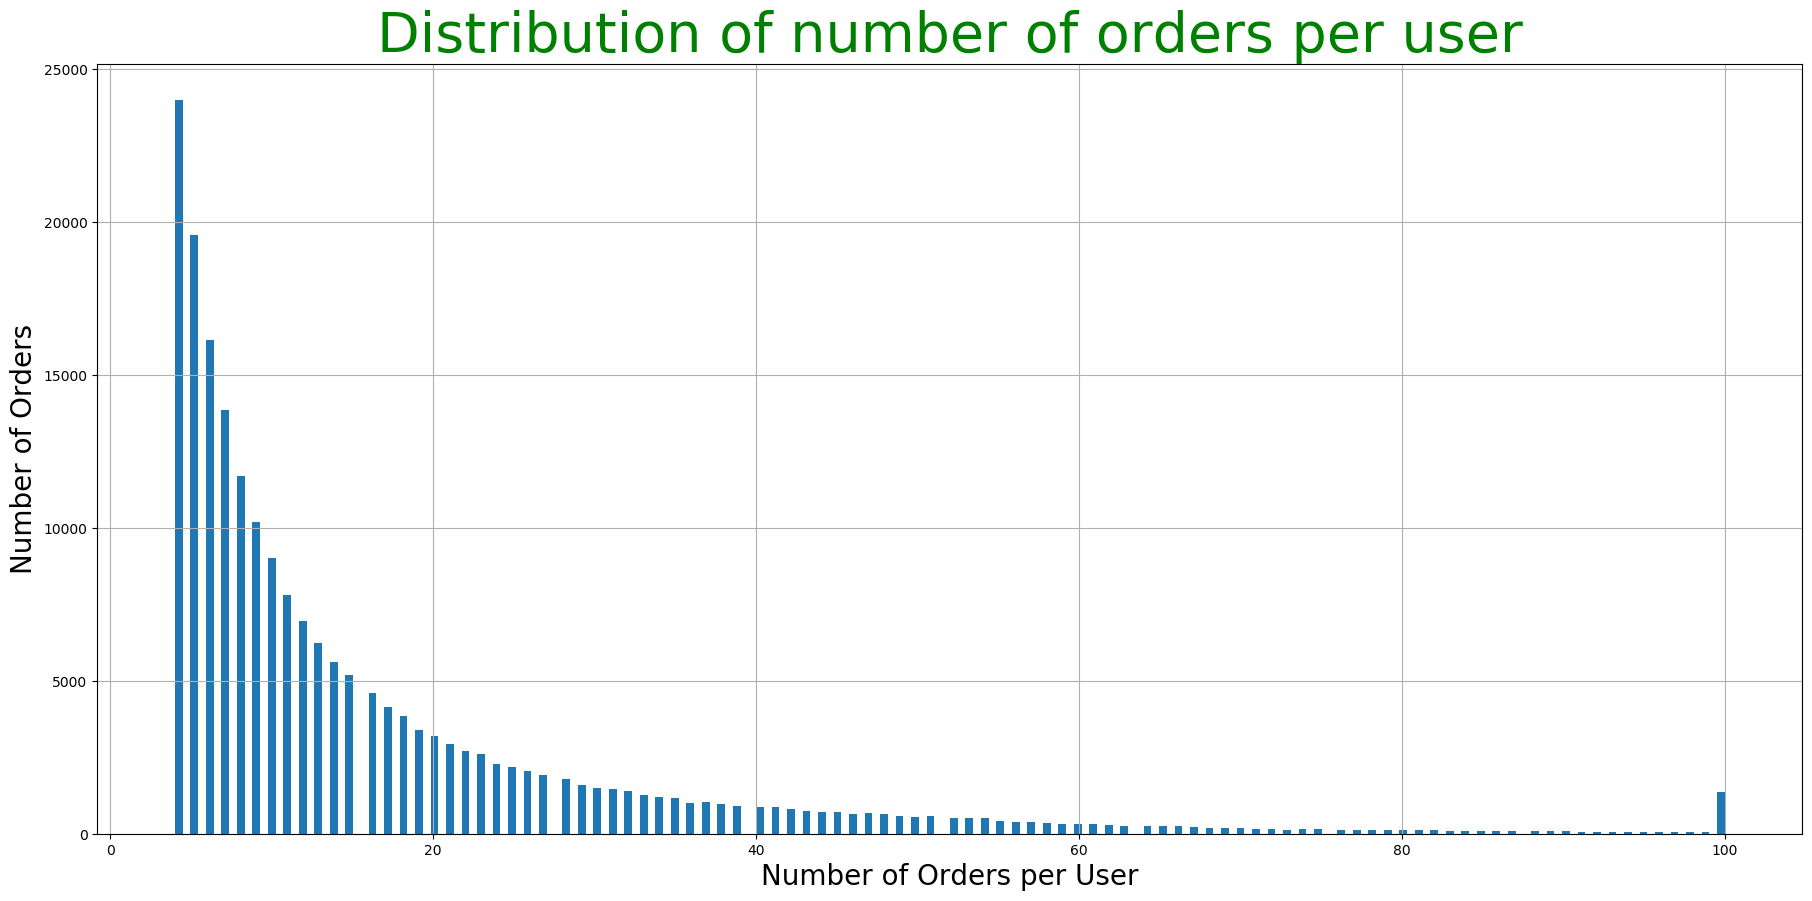

In [348]:
# histogram of number of orders per user
plt.figure(figsize=(22,10))
plt.hist(orders_per_user_list, bins=200)
plt.title('Distribution of number of orders per user', color="g", fontsize=40)
plt.xlabel('Number of Orders per User', color="black", fontsize=20)
plt.ylabel("Number of Orders", color="black", fontsize=20)
plt.grid()
plt.show()

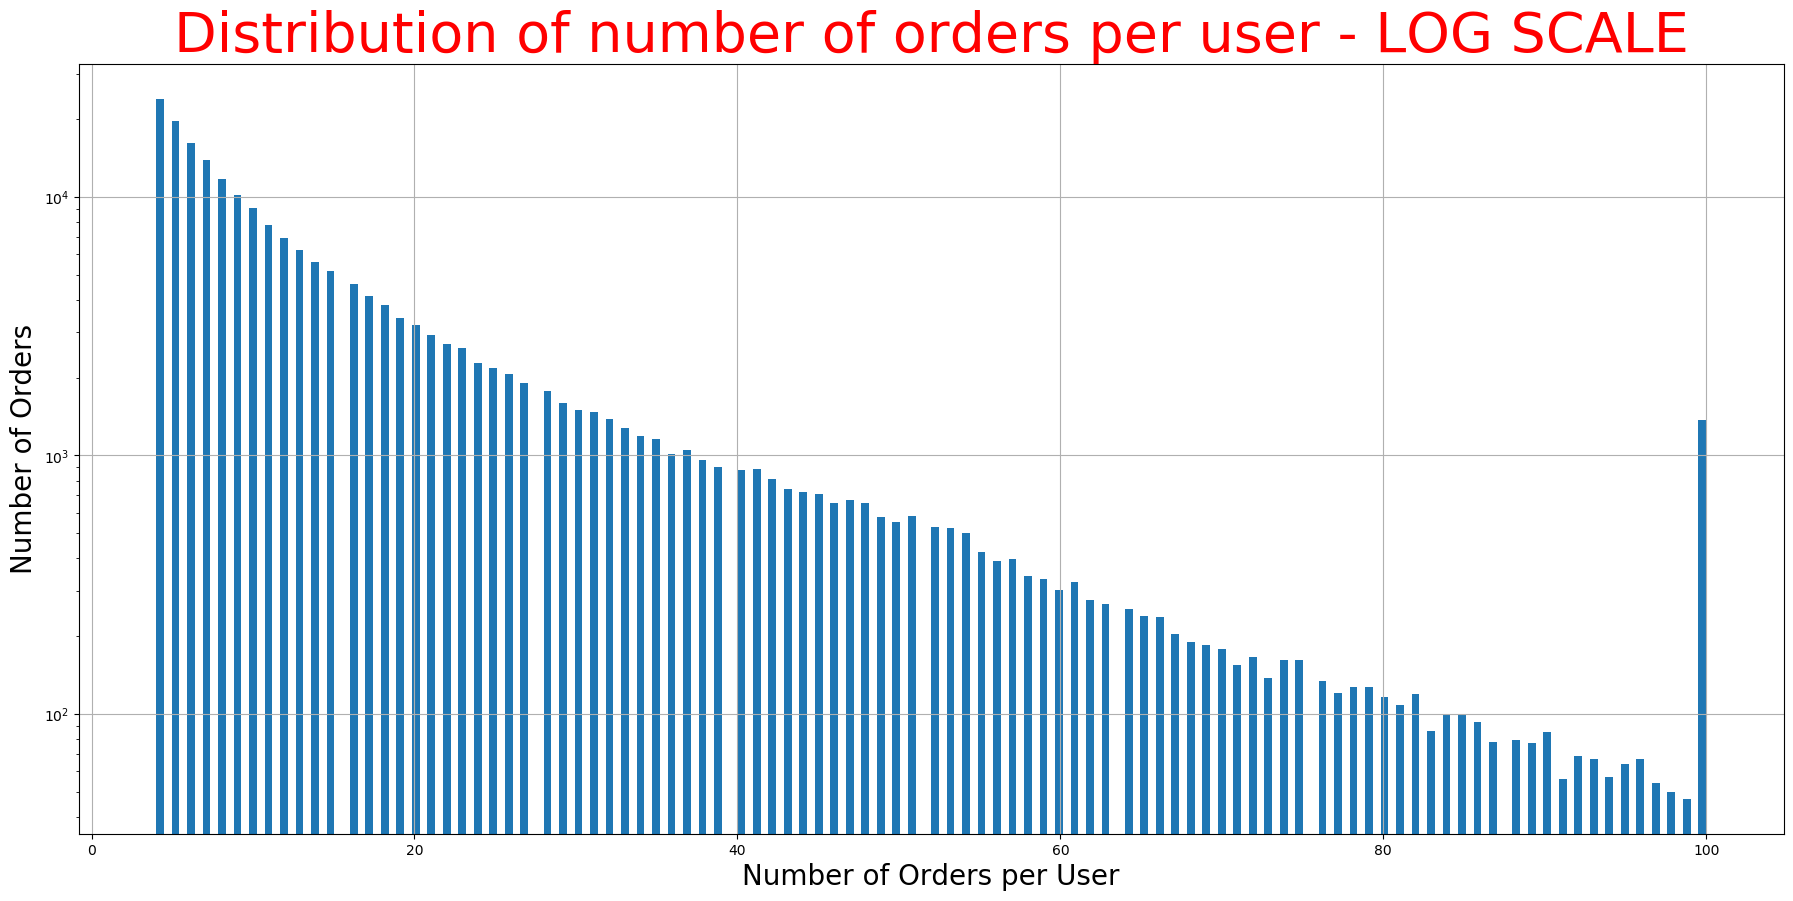

In [349]:
# histogram of number of orders per user - log scale
plt.figure(figsize=(22,10))
plt.hist(orders_per_user_list, bins=200, log=True)
plt.title('Distribution of number of orders per user - LOG SCALE', color="r", fontsize=40)
plt.xlabel('Number of Orders per User', color="black", fontsize=20)
plt.ylabel("Number of Orders", color="black", fontsize=20)
plt.grid()
plt.show()

I noted that, on log scale, number of orders is inversely proportional to order size

In [350]:
# Basics stats for number of orders per user

import statistics

mean_number_orders_per_user=statistics.mean(orders_per_user_list)
median_number_orders_per_user=statistics.median(orders_per_user_list)
mode_number_orders_per_user=statistics.mode(orders_per_user_list)
min_number_orders_per_user=min(orders_per_user_list)
max_number_orders_per_user=max(orders_per_user_list)

In [351]:
print("Minimum number of orders per user" ,min_number_orders_per_user)
print("Maximum number of orders per user" ,max_number_orders_per_user)
print("Mean number of orders per user" ,mean_number_orders_per_user)
print("Median number of orders per user" ,median_number_orders_per_user)
print("Mode number of orders per user" ,mode_number_orders_per_user)

Minimum number of orders per user 4
Maximum number of orders per user 100
Mean number of orders per user 16.590379616697703
Median number of orders per user 10.0
Mode number of orders per user 4


In [352]:
# finding the number of missing data points in the orders dataset
df_orders.isnull().sum().sum()

206209

In [353]:
df_orders["order_hour_of_day"].isnull().sum()

0

In [354]:
# all the missing data points are in the "days_since_prior_order" column
df_orders["days_since_prior_order"].isnull().sum()

206209

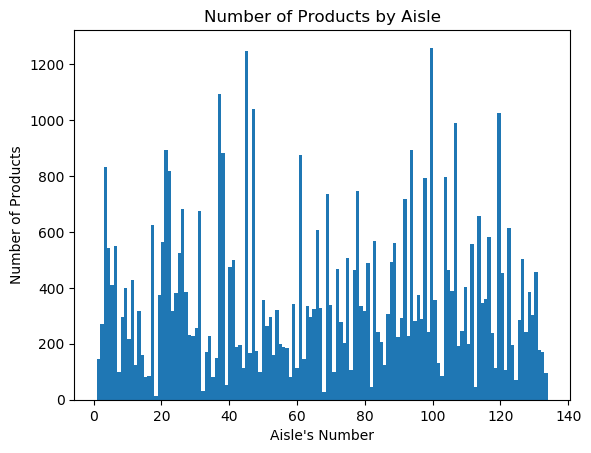

In [355]:
# number of products in each aisle

plt.hist(df_products["aisle_id"], bins=134)
plt.title("Number of Products by Aisle")
plt.xlabel("Aisle's Number")
plt.ylabel("Number of Products")
plt.show()

There is a large variation in the number of products for different aisles

In [356]:
ten_most_popular_isles=df_aisles.loc[df_aisles['aisle_id'].isin(df_order_products_prior["product_id"].value_counts()[:10].index.tolist())]
ten_most_popular_isles

,aisle_id,aisle


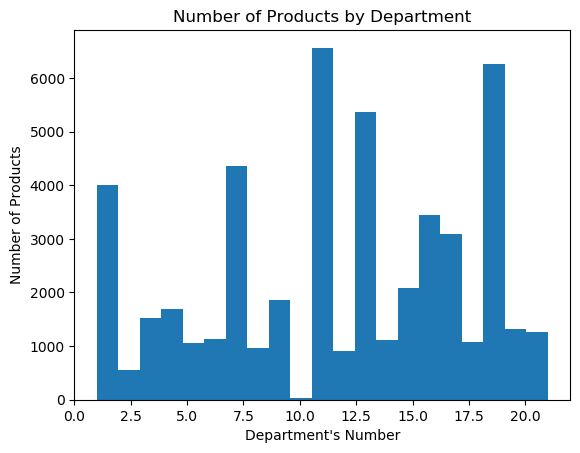

In [357]:
# number of products in each department

plt.hist(df_products["department_id"], bins=21)
plt.title("Number of Products by Department")
plt.xlabel("Department's Number")
plt.ylabel("Number of Products")
plt.show()

As we can see, the number of products in each department varies quite a bit.
It looks like a few most popular departments taken together host the most products.

In [358]:
products_ordered_at_least_once=df_products[df_products["product_id"].isin(list(df_order_products_prior["product_id"]))]
                            

In [359]:
# Number of products ordered at least once
products_ordered_at_least_once.shape[0]

49677

In [360]:
# Checking which products were never ordered in the Prior set
products_never_ordered=df_products[~df_products["product_id"].isin(list(df_order_products_prior["product_id"]))]
products_never_ordered

,product_id,product_name,aisle_id,department_id
3629,3630,Protein Granola Apple Crisp,57,14
3717,3718,Wasabi Cheddar Spreadable Cheese,21,16
7044,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13
25382,25383,Chocolate Go Bites,61,19
27498,27499,Non-Dairy Coconut Seven Layer Bar,100,21
36232,36233,Water With Electrolytes,100,21
37702,37703,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...,75,17
43724,43725,Sweetart Jelly Beans,100,21
45970,45971,12 Inch Taper Candle White,101,17
46624,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7


It turns out that only 11 products were never ordered in the Prior set

In [361]:
products_never_ordered.shape[0]

11

In [362]:
# percentage of items that have been reordered and percentage of items that were ordered for the first time
# in the Prior set
percentages_prior=df_order_products_prior.reordered.value_counts(1)

Text(0.5, 1.0, 'Percentage of Items Reordered - Prior Set')

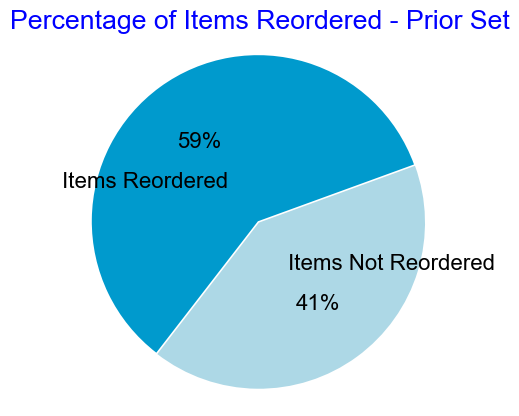

In [363]:
# Charting Percentage of Items Reordered - Prior Set
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['Items Reordered', 'Items Not Reordered']

explode=(.01,0)
ax.pie(percentages_prior, explode=explode, labels=labels, 
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=20,   
       pctdistance=.6,labeldistance=.3)
ax.axis('equal')
ax.set_title("Percentage of Items Reordered - Prior Set", color="blue")

In [364]:
# percentage of items that have been reordered and percentage of items that were ordered for the first time
# in the Train set
percentages_train=df_order_products_train.reordered.value_counts(1)

Text(0.5, 1.0, 'Percentage of Items Reordered - Train Set')

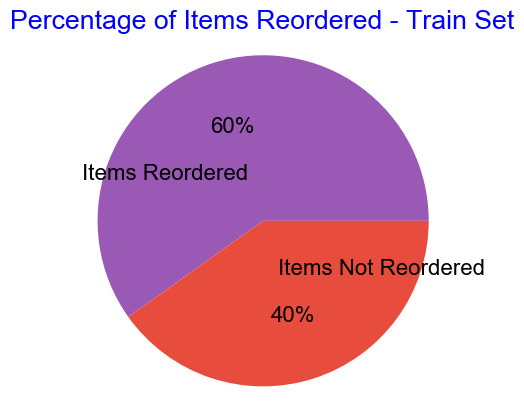

In [365]:
# Charting Percentage of Items Reordered - Train Set

color_palette_list = ["#9b59b6","#e74c3c","#34495e", "#2ecc71", "#3498db"]
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['Items Reordered', 'Items Not Reordered']

explode=(0,0)
ax.pie(percentages_train, explode=explode, labels=labels, 
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=.6,labeldistance=.3)
ax.axis('equal')
ax.set_title("Percentage of Items Reordered - Train Set", color = "blue")

As we can see, the percentage of items reordered is similar in Prior vs Train

In [366]:
# Calculating the percentages of orders with at least one reordered item
# and orders with no reordered items in the Prior set
num_orders_with_reordered_items_prior=df_order_products_prior[df_order_products_prior["reordered"]==1].order_id.nunique()
percentage_orders_with_reordered_items_prior=num_orders_with_reordered_items/df_order_products_prior.order_id.nunique()
percentage_orders_with_no_reordered_items_prior=1-percentage_orders_with_reordered_items
percentages_orders_prior=[percentage_orders_with_reordered_items_prior, percentage_orders_with_no_reordered_items_prior]

Text(0.5, 1.0, '% of Orders with Items Reordered - Prior Set')

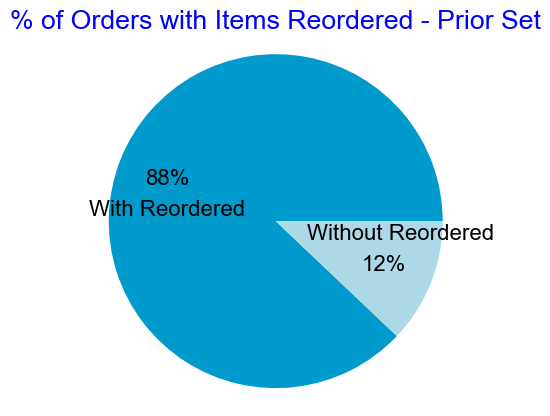

In [367]:
# Charting the percentages of orders with at least one reordered item
# and orders with no reordered items in the Prior set

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['With Reordered', 'Without Reordered']

explode=(0,0)
ax.pie(percentages_orders_prior, explode=explode, labels=labels, 
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=.7,labeldistance=.2)
ax.axis('equal')
ax.set_title("% of Orders with Items Reordered - Prior Set", color="blue")

In [368]:
# Calculating the percentages of orders with at least one reordered item
# and orders with no reordered items in the Train set

num_orders_with_reordered_items_train=df_order_products_train[df_order_products_train["reordered"]==1].order_id.nunique()
percentage_orders_with_reordered_items_train=num_orders_with_reordered_items_train/df_order_products_train.order_id.nunique()
percentage_orders_with_no_reordered_items_train=1-percentage_orders_with_reordered_items_train
percentages_orders_train=[percentage_orders_with_reordered_items_train, percentage_orders_with_no_reordered_items_train]

Text(0.5, 1.0, '% of Orders with Items Reordered - Train Set')

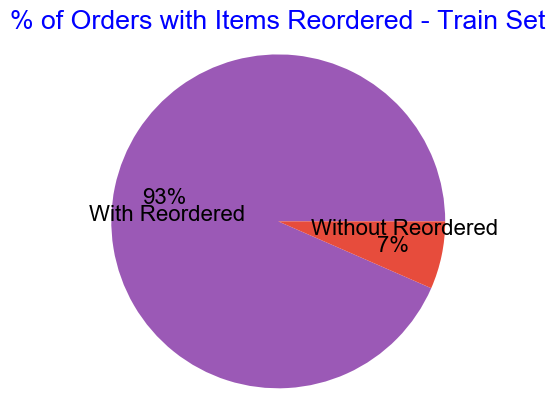

In [369]:
# Calculating the percentages of orders with at least one reordered item
# and orders with no reordered items in the Train set

color_palette_list = ["#9b59b6","#e74c3c","#34495e", "#2ecc71", "#3498db"]
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['With Reordered', 'Without Reordered']

explode=(0,0)
ax.pie(percentages_orders_train, explode=explode, labels=labels, 
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=.7,labeldistance=.2)
ax.axis('equal')
ax.set_title("% of Orders with Items Reordered - Train Set", color="blue")

As we see, the percentages of orders with no reordered items are quite different in Prior vs Train

In [370]:
add_to_cart_list=list(df_order_products_prior["add_to_cart_order"])

In [371]:
# calculating the list with the number of items for each order
# I had to do code it in this way vs shorter and more elegant code since the elegant code was not efficient enough
# and never finished calculating

order_size_list=[]
for i in range(len(add_to_cart_list)-1):
    if (add_to_cart_list[i+1]==1):
        order_size_list.append(add_to_cart_list[i])

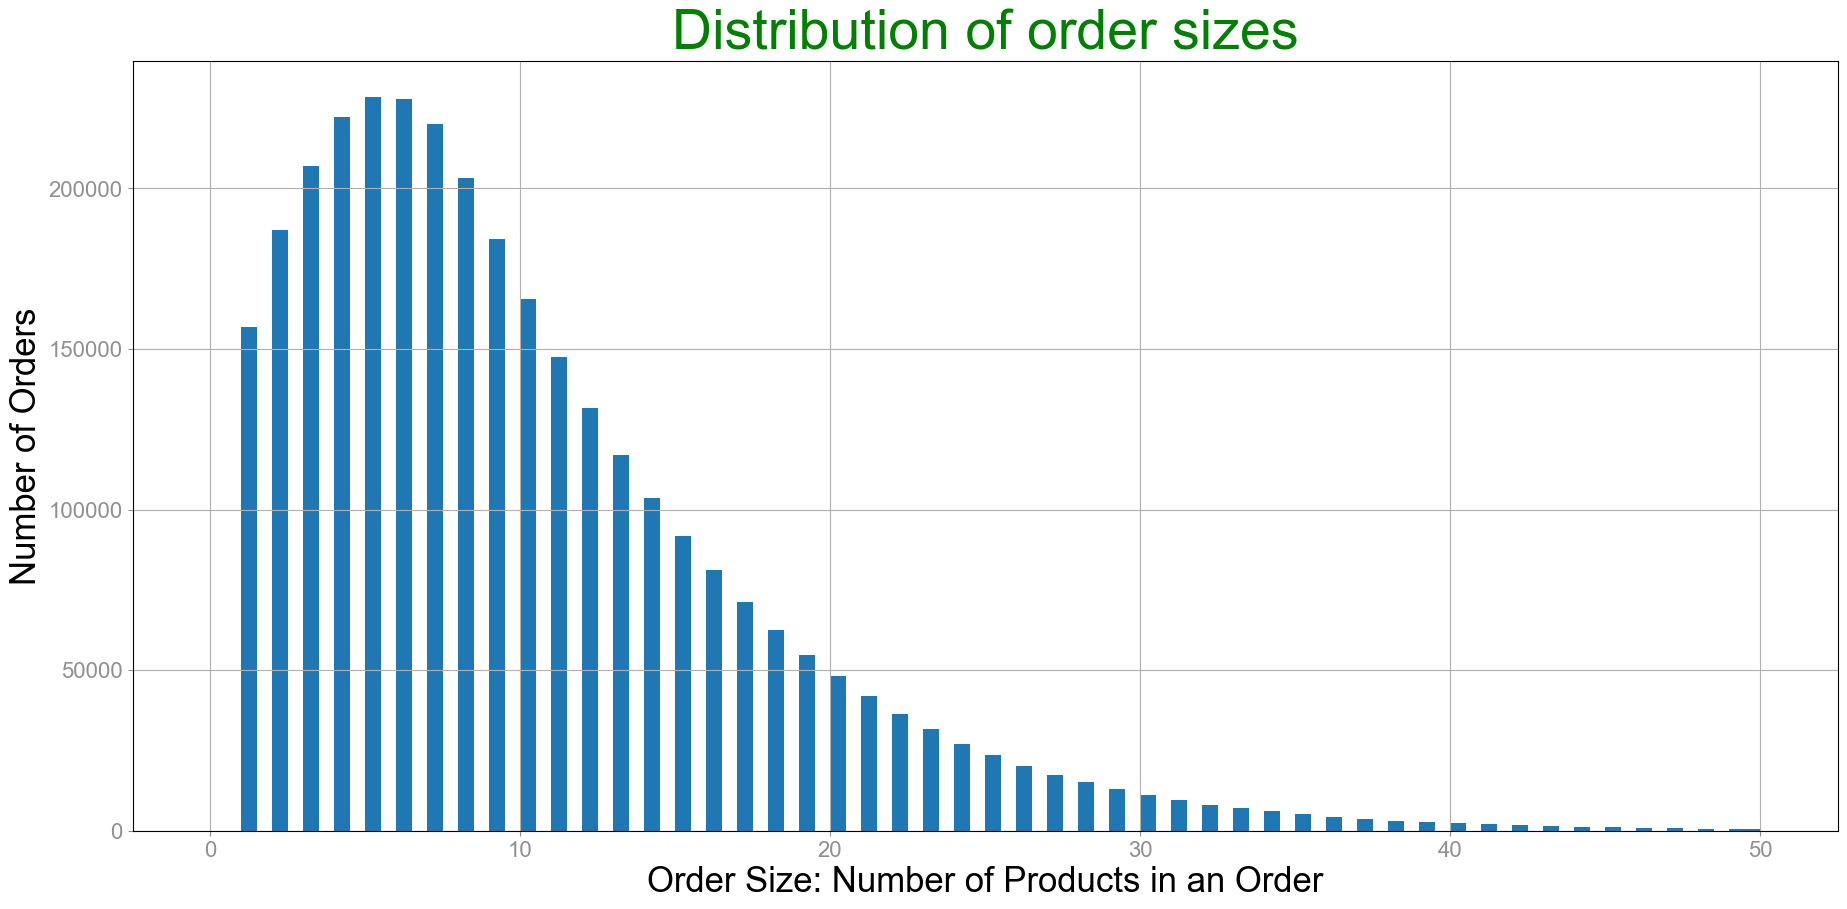

In [372]:
# histogram of order sizes

plt.figure(figsize=(22,10))
plt.hist(order_size_list, bins=100, range = (0,50))
plt.title('Distribution of order sizes', fontsize=40, color = "g")
plt.xlabel('Order Size: Number of Products in an Order', fontsize=25, color="black")
plt.ylabel("Number of Orders", fontsize=25, color="black")
plt.grid(True)
plt.show()

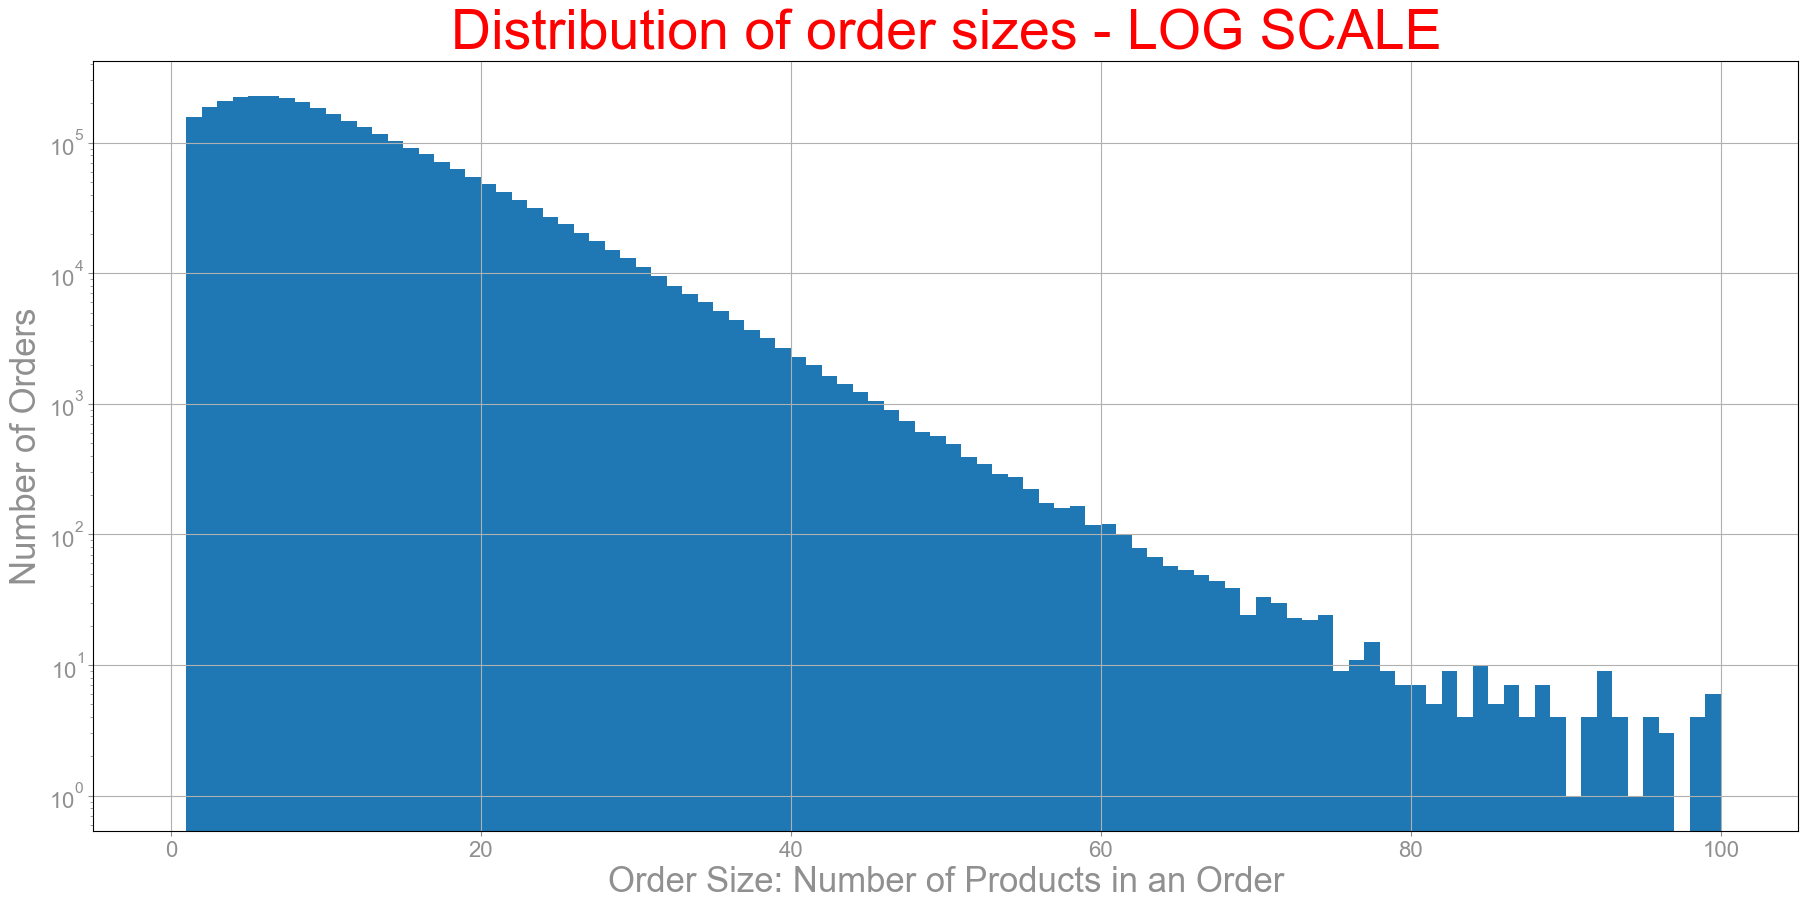

In [373]:
# histogram of order sizes - LOG scale

plt.figure(figsize=(22,10))
plt.hist(order_size_list, bins=100, range = (0,100), log=True)
plt.title('Distribution of order sizes - LOG SCALE', fontsize=40, color = "r")
plt.xlabel('Order Size: Number of Products in an Order', fontsize=25)
plt.ylabel("Number of Orders", fontsize=25)
plt.grid(True)
plt.show()

I have noted that the relationship between the number of items in an order and nu,mber of orders is
inverse linear on log scale

In [374]:
# some basic stats for number of items in each order

import statistics
mean_order_size=statistics.mean(order_size_list)
median_order_size=statistics.median(order_size_list)
mode_order_size=statistics.mode(order_size_list)
min_order_size=min(order_size_list)
max_order_size=max(order_size_list)

In [375]:
print("Mean order size is" ,mean_order_size)
print("Median order size is" ,median_order_size)
print("Mode order size is" ,mode_order_size)
print("Minimum order size is" ,min_order_size)
print("Maximum order size is" ,max_order_size)

Mean order size is 10.088883448895182
Median order size is 8
Mode order size is 5
Minimum order size is 1
Maximum order size is 145


starting to work on determining most popular products

In [377]:
prior_orders_merge.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [378]:
# The number of times the most popular product was ordered
df_order_products_prior['product_id'].value_counts().max()

472565

In [379]:
# The product id of the most popular product (it's a banana)
df_order_products_prior['product_id'].value_counts().idxmax()

24852

In [380]:
prior_orders_merge['product_id'].value_counts().max()

472565

In [381]:
df_products.loc[df_products['product_id'] == df_order_products_prior['product_id'].value_counts().idxmax()]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


In [382]:
df_products.loc[df_products['product_id'] == prior_orders_merge['product_id'].value_counts().idxmax()]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


In [383]:
# product ids for the 10 most popular products
ten_most_popular_product_ids=df_order_products_prior["product_id"].value_counts()[:10].index.tolist()
ten_most_popular_product_ids

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [384]:
# slice of the merged dataframe corresponding to 10 most popular products
df_top_ten_products=prior_orders_merge.loc[prior_orders_merge['product_id'].isin(ten_most_popular_product_ids)]
df_top_ten_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
252787,3,21903,4,1,Organic Baby Spinach,123,4
252788,26,21903,6,0,Organic Baby Spinach,123,4
252789,31,21903,3,1,Organic Baby Spinach,123,4
252790,39,21903,4,0,Organic Baby Spinach,123,4
252791,56,21903,8,1,Organic Baby Spinach,123,4


In [385]:
# share of item orders corresponding to the top ten products
# it is quite high at 7%!

top_10_share=df_top_ten_products.shape[0]/df_order_products_prior.shape[0]
top_10_share

0.07162616312530776

In [386]:
ten_highest_values=df_order_products_prior["product_id"].value_counts().nlargest(n=10)
ten_highest_values.values

array([472565, 379450, 264683, 241921, 213584, 176815, 152657, 142951,
       140627, 137905], dtype=int64)

In [387]:
df_products[df_products["product_id"]==ten_most_popular_product_ids[0]].product_name

24851    Banana
Name: product_name, dtype: object

In [388]:
top_ten_product_names=[]
for i in range(10):
    product_name=df_products[df_products["product_id"]==ten_most_popular_product_ids[i]].product_name.values[0]
    top_ten_product_names.append(product_name)
top_ten_product_names

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

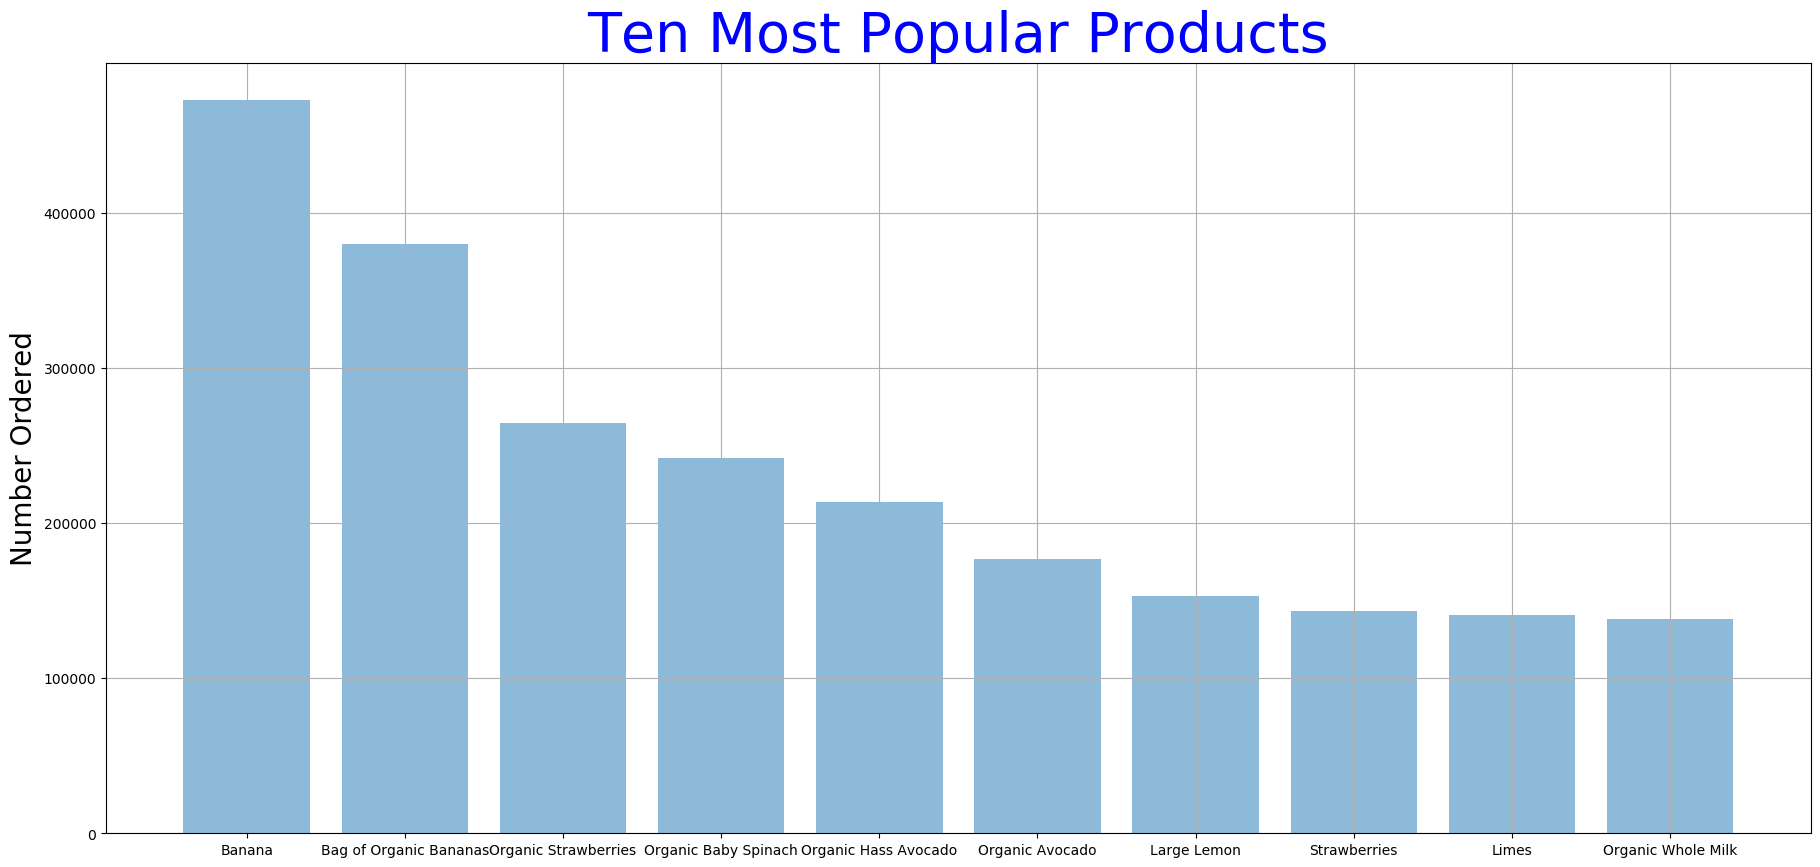

In [389]:
# charting top 10 most popular products

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))

y_pos = np.arange(len(top_ten_product_names))
number_ordered = ten_highest_values.values

plt.bar(y_pos, number_ordered, align='center', alpha=.5, width =0.8)
plt.xticks(y_pos, top_ten_product_names)
plt.ylabel('Number Ordered', fontsize=20)
plt.title('Ten Most Popular Products', color="blue", fontsize=40)
plt.grid(True)
plt.show()